# Homework 5 
## Section 1 - Data Preparation
### Loading all Libraries

In [12]:
import sys

import sklearn
import numpy as np
import pandas as pd
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from scipy.spatial import distance_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from graphviz import Source
from sklearn.tree import export_graphviz
# for consistent output
np.random.seed(2022)

# To plot charts
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=20)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)

### Load data

In [4]:
df = pd.read_csv('/Users/shivangi/Desktop/Applied Machine learning/Week 5/Assignment/HW4-data-fedPaper.csv')
df.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


### Data Pre-processing

In [5]:
# Get Colummns with missing values
df.isna().sum()

author      0
filename    0
a           0
all         0
also        0
           ..
who         0
will        0
with        0
would       0
your        0
Length: 72, dtype: int64

 No columns with missing values were found

In [7]:
# Get unique authors from author column
df.author.unique()

array(['dispt', 'Hamilton', 'HM', 'Jay', 'Madison'], dtype=object)

In [8]:
# Selecting file that are authored by Hamilton And Madison
dfSubset = df.copy()
dfSubset = dfSubset.loc[(dfSubset['author'] == 'Hamilton') | (dfSubset['author'] == 'Madison')]
dfSubset.shape

(66, 72)

In [10]:
# Removing column filename
dfSubset = dfSubset.drop(columns = ['filename'])
dfSubset.shape

(66, 71)

In [11]:
# Split Data into Train and Test
# Define X as all independent variables and y as target variable
X = dfSubset.iloc[:,1:71]
y = dfSubset[["author"]]

In [14]:
# Splitting train and test data in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2022)

## Section 2 - Build and tune decision tree models 

In [15]:
#Create model
tree_clf = DecisionTreeClassifier()

In [16]:
#Train model
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# get value counts for each author from training data
y_train.value_counts()

author  
Hamilton    39
Madison     13
dtype: int64

In [18]:
# get value counts for each author from test data
y_test.value_counts()

author  
Hamilton    12
Madison      2
dtype: int64

As seen above, Hamilton data is more than Madison in both train and test data. This could affect the output.

In [19]:
# Predict and evaluate model accuracy
# Test accuracy based on y_test

y_pred = tree_clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("AUC:", metrics.roc_auc_score(y_test, tree_clf.predict_proba(X_test)[:, 1]))

Accuracy: 0.9285714285714286
AUC: 0.75


We will use Accuracy and AUC metrics to evaluate the quality of the classification model.

Accuracy shows (number of correctly predicted samples / total number of samples). <br>
All wrong predictions will lead to AUC of 0 while all correct predictions has AUC of 1.0. <br>
The above created model has an accuracy of 92.86% and AUC of 0.75.

In [20]:
# visualize the model's decision tree

export_graphviz(tree_clf, out_file = "authorDecisionTree.dot",
                feature_names = dfSubset.columns[1:], class_names = dfSubset.columns[0],
                rounded = True, filled = True)

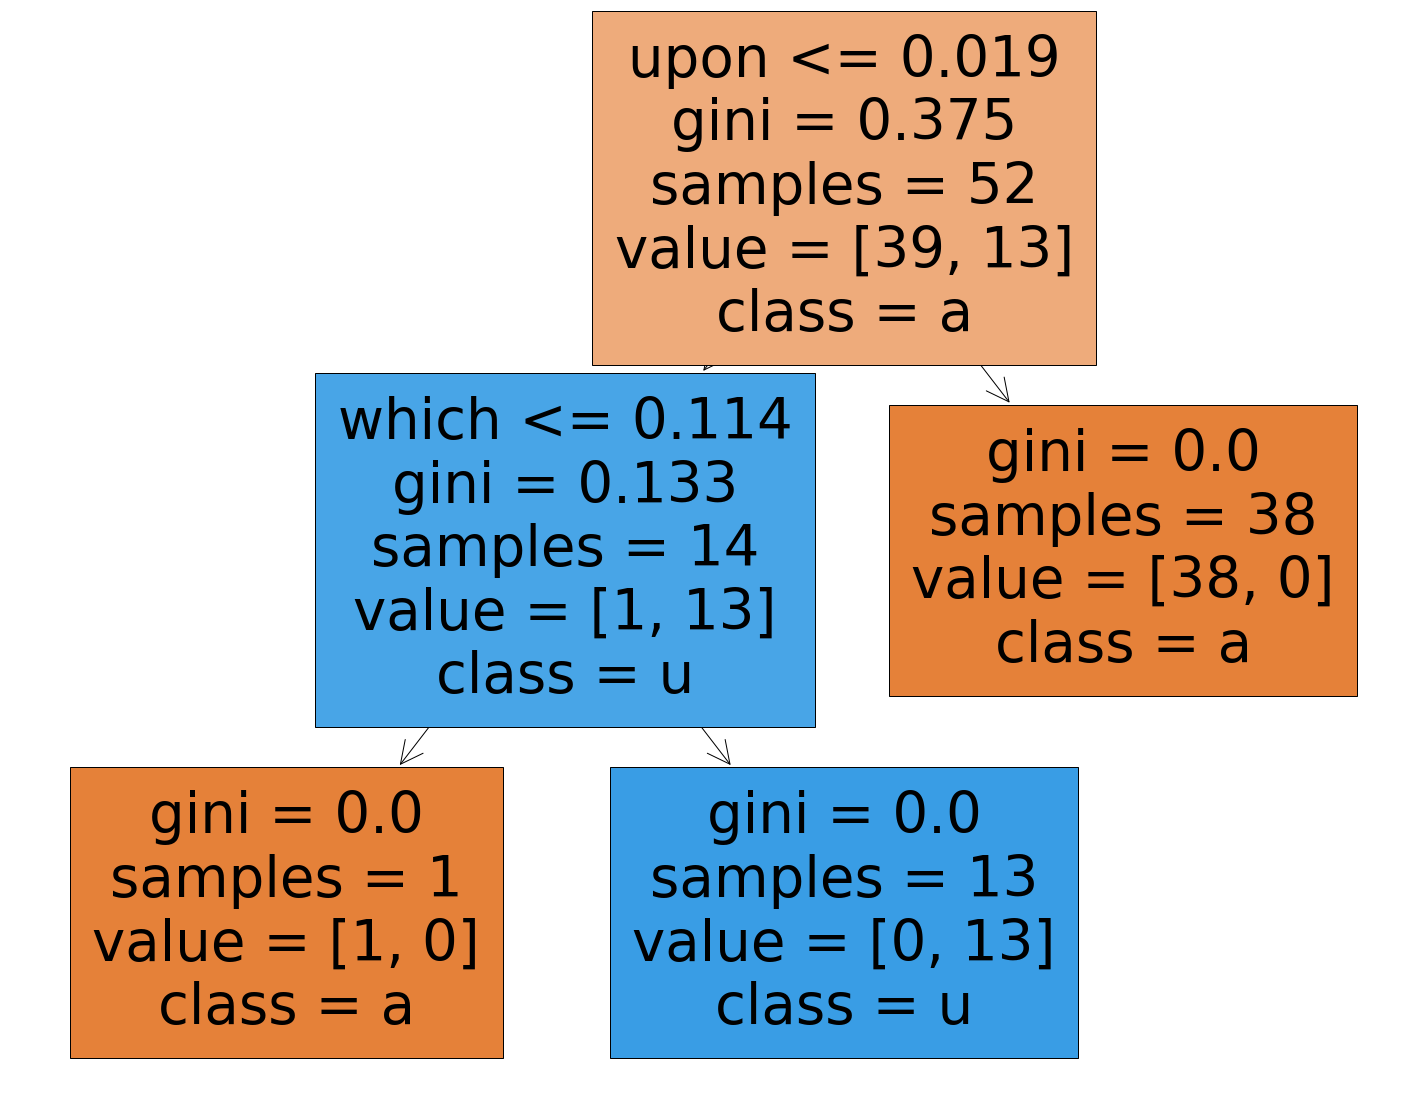

In [22]:
fig = plt.figure(figsize = (25, 20))
_fig = tree.plot_tree(tree_clf, feature_names = dfSubset.columns[1:],
                   class_names = dfSubset.columns[0], filled = True)

From the above decision tree visulaization we see that the model chose the 'upon' word as the decision point followed by 'which'.

A way to read this tree would be if the model sees that the word "upon" > 0.019, then it will classify as Hamilton (this has 38 values/counts of Hamilton from training data), else it will proceed to the next node where it checks the word "which". If "which" > 0.114 then it will classify as Madison (13 counts from training data) else Hamilton (1 count from training data).

Here, we have used the default settings classifier i.e. the max_dept, min_sample_leafs of the tree and other parameters are not set which leads to fully grown and unpruned trees.

#### Tune the model by tuning the parameters

We can train different models with different max_depth and min_samples_leaf parameters and find and compare their accuracy to land on the best decision tree model.

In [36]:
for i in range(5):
    for j in range(5):
        tree_clf_loop = DecisionTreeClassifier(max_depth = i + 1, min_samples_leaf = j + 1, random_state = 2022)
        tree_clf_loop.fit(X_train, y_train)
        modelAccuracy_loop = metrics.accuracy_score(y_test, tree_clf_loop.predict(X_test))
        print("max_depth: ", i + 1, "min_samples_leaf: ", j + 1, "Accuracy: ", modelAccuracy_loop)

max_depth:  1 min_samples_leaf:  1 Accuracy:  1.0
max_depth:  1 min_samples_leaf:  2 Accuracy:  1.0
max_depth:  1 min_samples_leaf:  3 Accuracy:  1.0
max_depth:  1 min_samples_leaf:  4 Accuracy:  1.0
max_depth:  1 min_samples_leaf:  5 Accuracy:  1.0
max_depth:  2 min_samples_leaf:  1 Accuracy:  0.9285714285714286
max_depth:  2 min_samples_leaf:  2 Accuracy:  0.9285714285714286
max_depth:  2 min_samples_leaf:  3 Accuracy:  1.0
max_depth:  2 min_samples_leaf:  4 Accuracy:  1.0
max_depth:  2 min_samples_leaf:  5 Accuracy:  1.0
max_depth:  3 min_samples_leaf:  1 Accuracy:  0.9285714285714286
max_depth:  3 min_samples_leaf:  2 Accuracy:  0.9285714285714286
max_depth:  3 min_samples_leaf:  3 Accuracy:  1.0
max_depth:  3 min_samples_leaf:  4 Accuracy:  1.0
max_depth:  3 min_samples_leaf:  5 Accuracy:  1.0
max_depth:  4 min_samples_leaf:  1 Accuracy:  0.9285714285714286
max_depth:  4 min_samples_leaf:  2 Accuracy:  0.9285714285714286
max_depth:  4 min_samples_leaf:  3 Accuracy:  1.0
max_depth:

from above result, we can try to visulaize any model with depth >= 3 and min_samples_leaf = 5 because they all have an accuracy of 100%

In [23]:
tree_clf2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 5, random_state = 2022)

tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=2022)

In [24]:
print("Accuracy:", metrics.accuracy_score(y_test, tree_clf2.predict(X_test)),
      "AUC:", metrics.roc_auc_score(y_test, tree_clf2.predict_proba(X_test)[:, 1]))

Accuracy: 1.0 AUC: 1.0


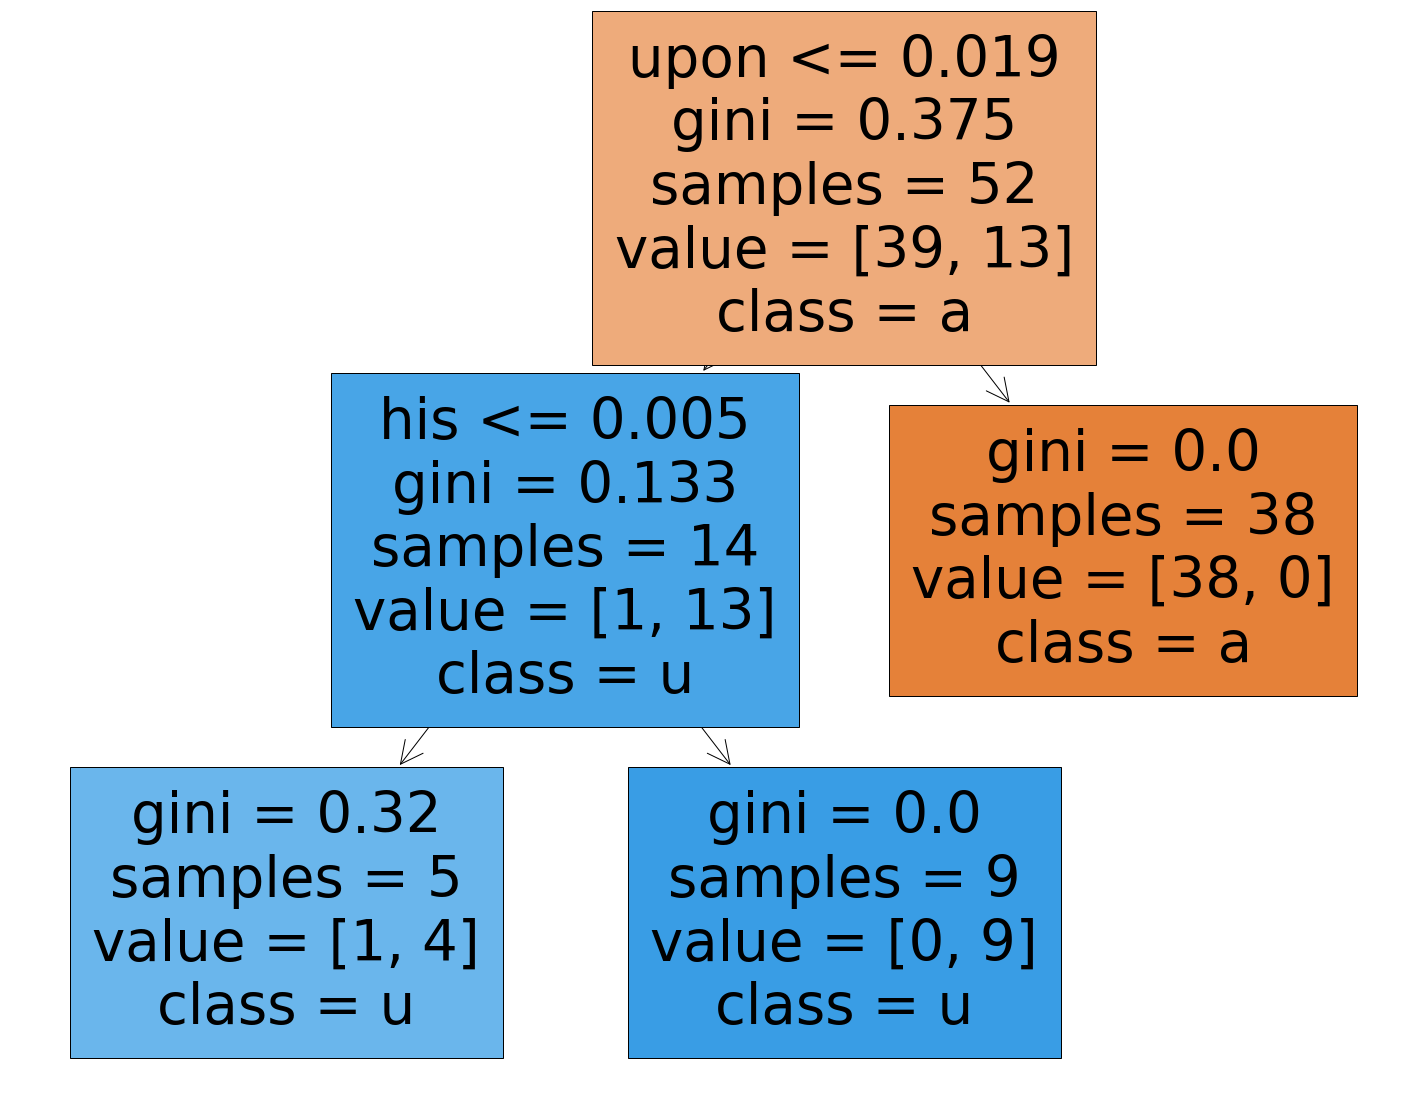

In [25]:
fig3 = plt.figure(figsize = (25,20))
fig3_ = tree.plot_tree(tree_clf2, feature_names = dfSubset.columns[1:], class_names = dfSubset.columns[0],
                       filled = True)

The decision tree with the default parameters has an accuracy of approx 93% on the training data whereas the tune classifer has an accuracy of 100% on the training data. However, it is clear that both of the models are not perfect for this case because the amount of the data is less and there is a data imbalance problem for this dataset. While comparing the models, it was observed that the default classifer chose "upon" and "which" as the decision points, whereas the tuned classiers chose "upon" and "his" as the decision points.

### Section 3 - Prediction

#### Classifying the disputed articles using the decision tree classifier built earlier

In [26]:
# test classification of disputed articles

disputedDf = df.copy()

disputedDf = disputedDf.loc[(disputedDf['author'] == 'dispt')]
disputedDf.shape

(11, 72)

In [27]:
dispt_Xtest = disputedDf.iloc[:,2:72]
dispt_ytest = disputedDf[["author"]]

In [28]:
y_pred_dispt = tree_clf.predict(dispt_Xtest)

In [29]:
y_pred_dispt = pd.DataFrame(y_pred_dispt)
y_pred_dispt.value_counts()

Madison     9
Hamilton    2
dtype: int64

In the above results from the untuned decision tree model, we see that out of the total 11 disputed articles, 9 were classified as authored by Madison and 2 by Hamilton.

In [30]:
y_pred_dispt2 = tree_clf2.predict(dispt_Xtest)

In [31]:
y_pred_dispt2 = pd.DataFrame(y_pred_dispt2)
y_pred_dispt2.value_counts()

Madison    11
dtype: int64

In the above results from the tuned decision tree model, we see that all 11 files were classified as authored by Madison.